<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>StellarClassification</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Jefferson de Oliveira Silva

| Column | Description |
| -- | -- |
| obj_ID | Object Identifier, the unique value that identifies the object in the image catalog used by the CAS |
| alpha | Right Ascension angle (at J2000 epoch) |
| delta | Declination angle (at J2000 epoch) |
| u | Ultraviolet filter in the photometric system |
| g | Green filter in the photometric system |
| r | Red filter in the photometric system |
| i | Near Infrared filter in the photometric system |
| z | Infrared filter in the photometric system |
| run_ID | Run Number used to identify the specific scan |
| rereun_ID | Rerun Number to specify how the image was processed |
| cam_col | Camera column to identify the scanline within the run |
| field_ID | Field number to identify each field |
| spec_obj_ID | Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) |
| class | object class (galaxy, star or quasar object) |
| redshift | redshift value based on the increase in wavelength |
| plate | plate ID, identifies each plate in SDSS |
| MJD | Modified Julian Date, used to indicate when a given piece of SDSS data was taken |
| fiber_ID | fiber ID that identifies the fiber that pointed the light at the focal plane in each observation |

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../../data/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Verifying null values

In [31]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Making spec_obj_ID the index class (because it's a unique id identifier) and droping the other id columns

In [24]:
df['spec_obj_ID'].is_unique

True

In [32]:
df.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID'], axis=1, inplace=True)

In [33]:
df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'spec_obj_ID',
       'class', 'redshift', 'plate', 'MJD'],
      dtype='object')

In [37]:
obj_cols = [col for col in df.columns if df[col].dtype == 'object']
obj_cols

['class']

## Encoding for Dataviz

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder(sparse=False)

class_ = pd.DataFrame(encoder.fit_transform(df[['class']]), columns=encoder.get_feature_names_out())
class_

,class_GALAXY,class_QSO,class_STAR
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
99995,1.0,0.0,0.0
99996,1.0,0.0,0.0
99997,1.0,0.0,0.0
99998,1.0,0.0,0.0


In [49]:
df_onehot = pd.concat([df, class_], axis=1).drop('class', axis=1)

In [55]:
corr = df_onehot.corr().abs()
corr.style.background_gradient(cmap='Blues')

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD,class_GALAXY,class_QSO,class_STAR
alpha,1.000000,0.138691,0.001532,0.002423,0.022083,0.023580,0.002918,0.019582,0.002553,0.001667,0.002554,0.019943,0.004085,0.014261,0.018461
delta,0.138691,1.000000,0.002074,0.003523,0.006835,0.004480,0.003630,0.032565,0.112329,0.031638,0.112329,0.107333,0.038297,0.065825,0.017011
u,0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.003548,0.029997,0.014309,0.029997,0.031997,0.023129,0.006590,0.021321
g,0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.003508,0.039443,0.022954,0.039443,0.040274,0.014289,0.006015,0.022780
r,0.022083,0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.008480,0.655245,0.433241,0.655243,0.671180,0.037997,0.255142,0.197722
i,0.023580,0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.007615,0.661641,0.492383,0.661640,0.672523,0.160379,0.370459,0.161545
z,0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.003365,0.037813,0.030380,0.037813,0.037469,0.008382,0.024361,0.013206
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,1.000000,0.001946,0.000097,0.001949,0.006745,0.020569,0.003317,0.021384
spec_obj_ID,0.002553,0.112329,0.029997,0.039443,0.655245,0.661641,0.037813,0.001946,1.000000,0.388642,1.000000,0.970167,0.109753,0.295908,0.150935
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.000097,0.388642,1.000000,0.388641,0.387109,0.256925,0.756649,0.414245


In [59]:
X, y = df_onehot.drop(['class_GALAXY', 'class_QSO', 'class_STAR'], axis=1), df_onehot[['class_GALAXY', 'class_QSO', 'class_STAR']]

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
ord_encoder = OrdinalEncoder()

In [66]:
ord_class = ord_encoder.fit_transform(df[['class']])
df_ordinal = df.copy()
df_ordinal['class'] = ord_class

In [69]:
X, y = df_ordinal.drop(['class'], axis=1), df_ordinal[['class']]

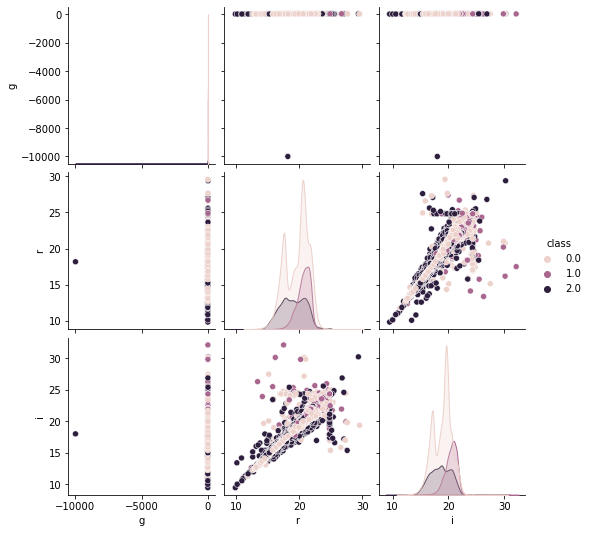

In [74]:
sns.pairplot(df_ordinal[['g','r','i']], hue='class')

In [77]:
df_ordinal.sample(10000)

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
65600,5.823409,24.366678,21.24252,19.51915,18.11435,17.56784,17.24259,2,7.748638e+18,0.0,0.232722,6882,56541
71310,250.727050,41.169988,20.42188,20.06683,19.90781,19.74648,19.40810,3,6.798422e+18,1.0,2.015267,6038,56090
90705,207.850922,33.727707,19.59507,18.13398,17.10703,16.62787,16.23478,6,2.283327e+18,0.0,0.169430,2028,53818
59974,258.927887,42.245939,22.25059,22.15243,21.91589,21.84671,20.88146,4,9.621054e+18,0.0,1.148171,8545,58041
20353,207.497632,20.991962,22.58866,21.24674,20.76786,20.31376,20.10271,4,6.608018e+18,1.0,0.675840,5869,56064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53345,117.006358,43.701496,24.89946,22.84288,21.27801,20.04169,19.73627,5,4.131184e+18,0.0,0.513841,3669,55481
7064,235.658738,56.602478,22.17494,21.19855,21.02761,20.94403,20.69636,3,9.485757e+18,1.0,2.306137,8425,58226
43097,204.836333,0.770354,23.66083,22.58946,21.02837,20.14394,19.69193,2,4.550954e+18,0.0,0.579244,4042,55626
92619,193.030652,57.184690,23.82116,24.16526,22.63112,20.83712,19.72050,3,9.267546e+18,0.0,0.880556,8231,58199


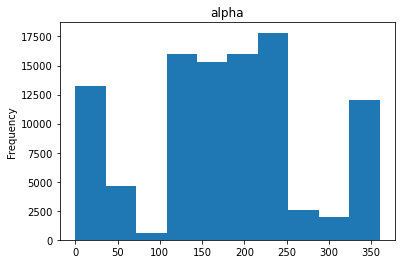

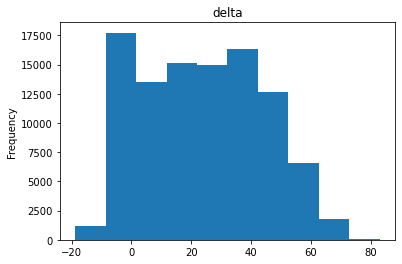

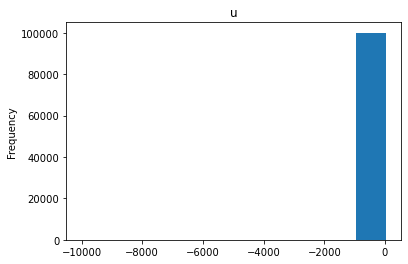

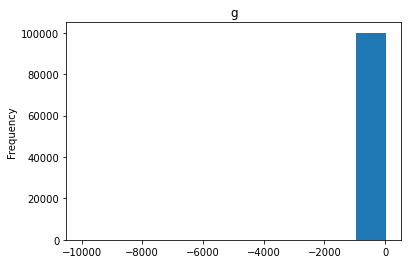

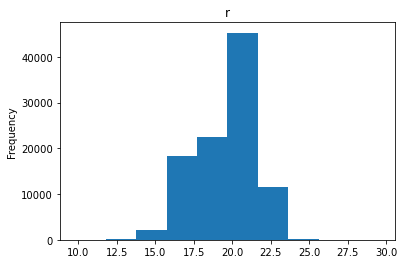

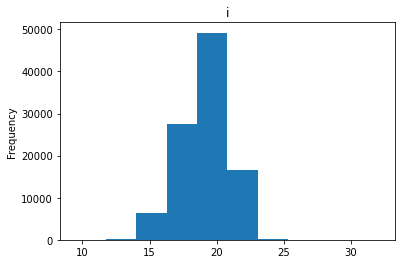

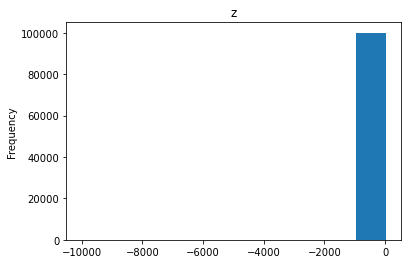

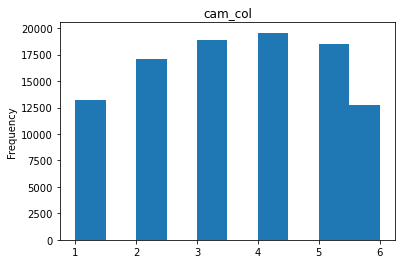

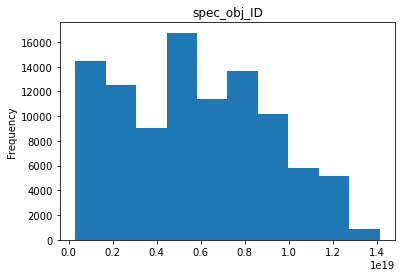

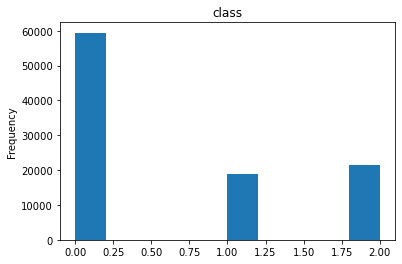

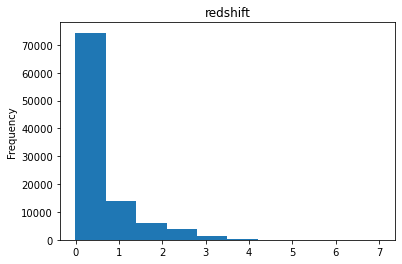

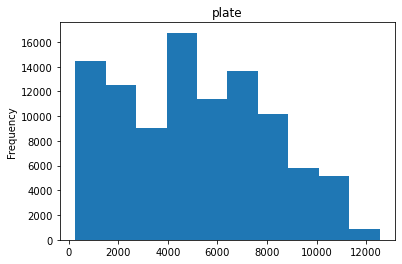

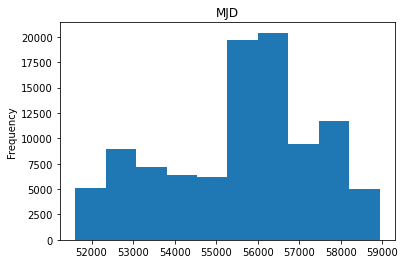

In [84]:
for col in df_ordinal.columns:
    plt.figure()
    plt.title(col)
    df_ordinal[col].plot(kind='hist')

In [3]:
features_plot = df.groupby('class').mean()

fig = px.bar(features_plot, x=features_plot.index, y=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'MJD'], barmode='group')
fig.update_layout(
    title = 'ATRIBUTO MÉDIO POR FEATURE'
)
fig.show()